# Time Series Data Analysis (FFT) Ex:


In [2]:
# dependencies 
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq

# Original signal
## This is the original signal, that we will need to recover.
## We are going to assume it a sine wave with a particular period. 



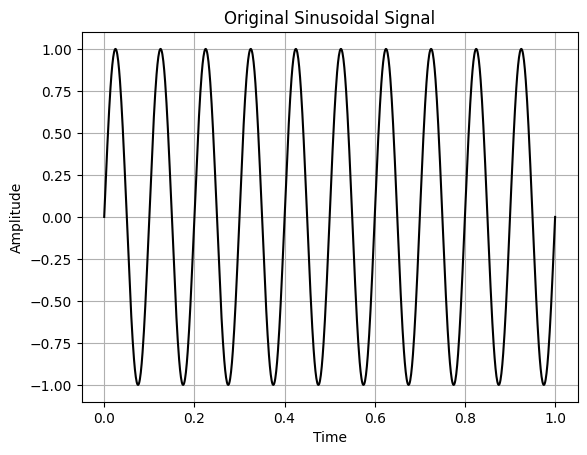

In [3]:
# Generate time values ranging from 0 to 2*Pi
# signal (y) = A* sin(wt)
# f = frequency 
# A = amplitude 
# t = time 
# and w = 2*pi*f 
# Generate sinusoidal signal at frequency 2 Hz 

f_original = 10  # Hz
A_original = 1  # Amplitude of the sine wave

time = np.linspace(0, 1, 1000)  # Time from 0 to 1, sample rate is 1/1000

# sine wave signal as our target that we will need to recover 
original_signal = A_original * np.sin(2 * np.pi * f_original * time)

# plot the signal 
plt.plot(time, original_signal, '-k')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Sinusoidal Signal")
plt.grid()
plt.show()

# Original signal is mixed with Other signals at a different  frequencies and amplitudes


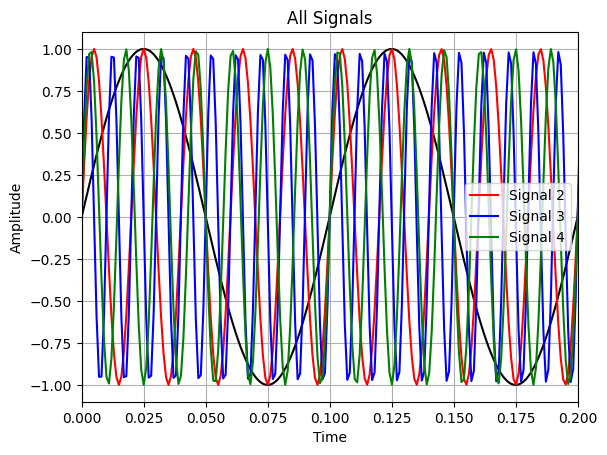

In [4]:
# let original signal get mixed with three other signals at frequency 
#  5*f_original, 10*f_original, 7*f_original
# For simplicity, assume the amplitudes to be the same as original signal.  
# In practice, we may not know the source of these signals 

# Amplitudes 
A_2 = A_original
A_3 = A_original 
A_4 = A_original

# frequecies 
f_2 =  5*f_original
f_3 =  10*f_original
f_4 =  7*f_original

# Signals 
signal_2 = A_2 * np.sin(2 * np.pi * f_2 * time)
signal_3 = A_3 * np.sin(2 * np.pi * f_3 * time)
signal_4 = A_4 * np.sin(2 * np.pi * f_4 * time)

plt.plot(time, original_signal, '-k')

plt.plot(time,signal_2, '-r', label= 'Signal 2')
plt.plot(time,signal_3, '-b', label= 'Signal 3')
plt.plot(time,signal_4, '-g', label= 'Signal 4')

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("All Signals")
# just for clarity 
plt.xlim([0,0.2])
plt.legend()
plt.grid()
plt.show()



# Original Signal gets distorted by other signal sources 


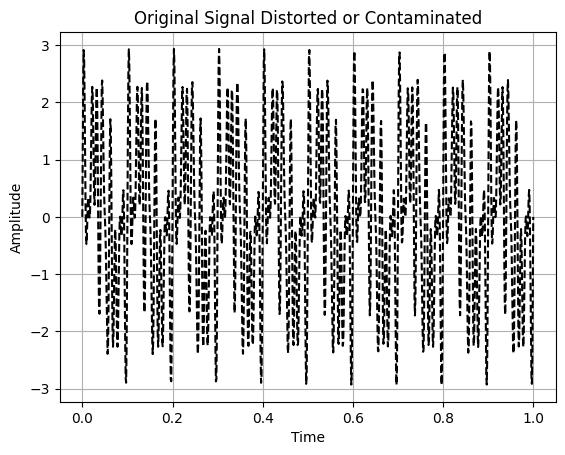

In [5]:
# In practice we might not know the source of these Signals 
#
siginal_sum = original_signal + signal_2 + signal_3 + signal_4 

plt.plot(time,siginal_sum , '--k')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Signal Distorted or Contaminated")
plt.grid()
plt.show()

# Add Random Noise:

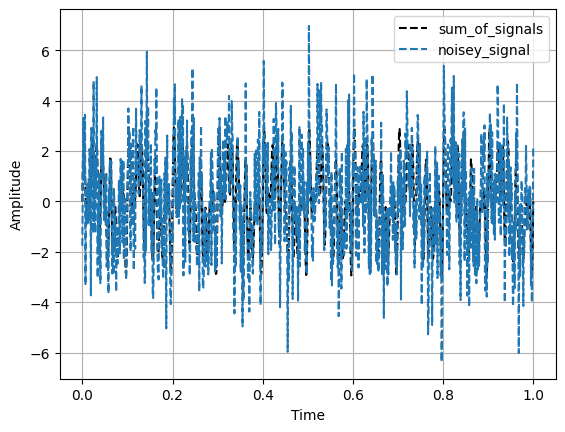

In [6]:
# Introduce random noise that affects the signal
# We assume the noise follows a white noise model, meaning it has a zero mean.
# The spread of the noise around its mean is determined by its variance or standard deviation (std), 
# where std = sqrt(variance).

# Create Noise 
noise_mean = 0
noise_std = 1.5
noise = np.random.normal(noise_mean,noise_std, len(time))  # Noise with mean 0 and standard deviation 0.2

# Add  noise to the Signal 
noisey_siginal = siginal_sum + noise

plt.plot(time,siginal_sum , '--k', label='sum_of_signals')
plt.plot(time,noisey_siginal, '--', label='noisey_signal')

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


# Add a DC offset to the signal 

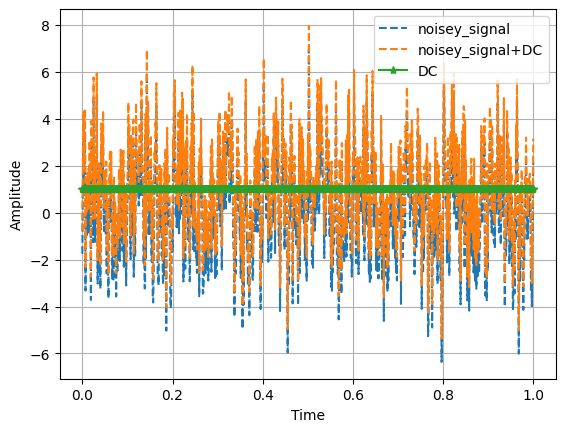

In [7]:
# Add a DC(Or simply think of it as a background) offset to the signal 

dc_value = 5  # Adjust this value as needed
DC = np.ones(time.size) # replicate just to one signle value 

final_siginal = DC + noisey_siginal
plt.plot(time,noisey_siginal, '--', label='noisey_signal')
plt.plot(time,final_siginal, '--', label='noisey_signal+DC')

plt.plot(time,DC, '-*', label='DC')

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


#                                             FFT 
## User-End Processing:
## Question: Can We Successfully Recover the Original Signal?


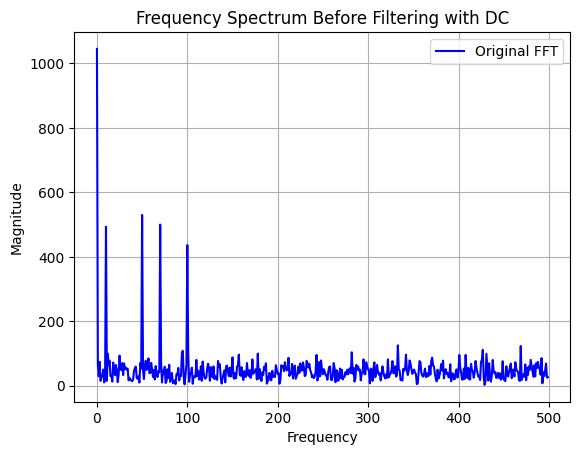

In [8]:
# We will use FFT and tempt to recover the original signal

# Transfer the signal into the frequency domain using FFT: 

fft_signal = fft(final_siginal)  # Compute the FFT

# get the length of the signal 
length_signal = len(time)

# Compute the frequency beans based n
frequencies = fftfreq(len(time), (time[1] - time[0]))  # f = 1/T Compute frequency bins

# remember FFT is symetric so we only take half of the spectrum representing the real 
on_real = len(frequencies)//2 # Floor Division (Integer Division)

plt.plot(frequencies[:on_real], np.abs(fft_signal[:on_real]), label="Original FFT", color='b')

plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum Before Filtering with DC")
plt.legend()
plt.grid()


In [9]:
# This is without any modification: 
# and we see the value at zero frequence has avery high Magnitude: 
# this corresponds to the DC value 
# so before analysis, we might need to remove the background values or DC values 

# Remove the background
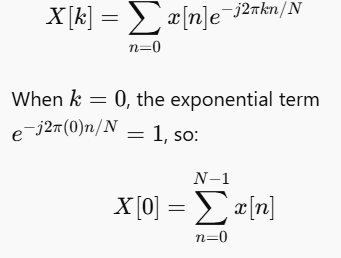

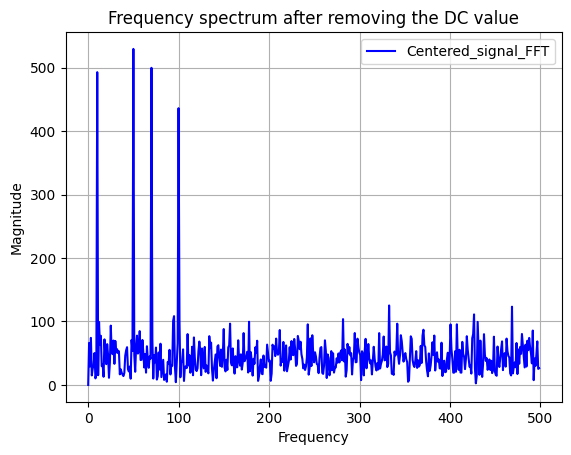

In [14]:
# Remove DC component before FFT
centered_signal = final_siginal - np.mean(final_siginal)
#plt.figure()
#plt.plot(time,centered_signal, label="Original FFT", color='b')
fft_centered_signal = fft(centered_signal)  # Compute the FFT

plt.plot(frequencies[:on_real ], np.abs(fft_centered_signal[:on_real]), label="Centered_signal_FFT", color='b')
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Frequency spectrum after removing the DC value")
plt.legend()
plt.grid()

# Extract the desired Signal


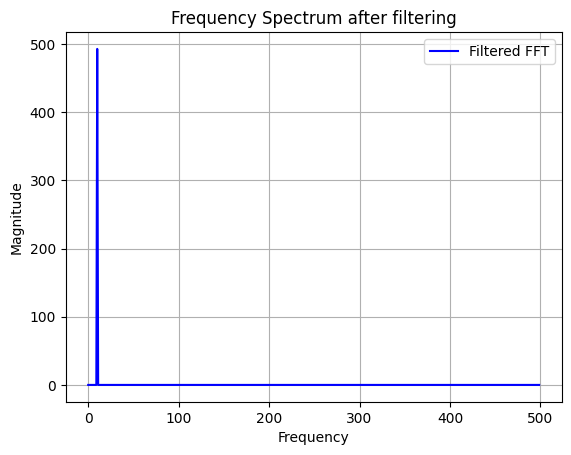

In [20]:
# We know that our target signal is confined to a specific frequency range.  
# Apply a filter to remove higher frequencies and isolate the original signal.  

fft_filtered = fft_centered_signal.copy() # lets get a copy before we mess things up by filtering 
filter_freq = f_original

# creat a filter: there are better ways! 
filter_array = (np.abs(frequencies) > (filter_freq)) |  (np.abs(frequencies) < (filter_freq-.1))
fft_filtered[filter_array] = 0  # Keep only low frequencies desired and set the rest to zero

# plot the outcome 
plt.plot(frequencies[:on_real], np.abs(fft_filtered[:on_real]), label="Filtered FFT", color='b')
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum after filtering")
plt.legend()
plt.grid()




# Recover the signal (use ifft, iverse transeform)
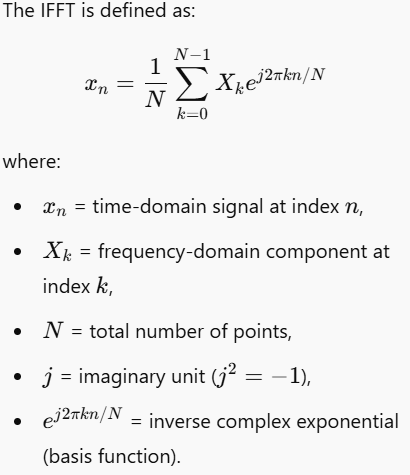



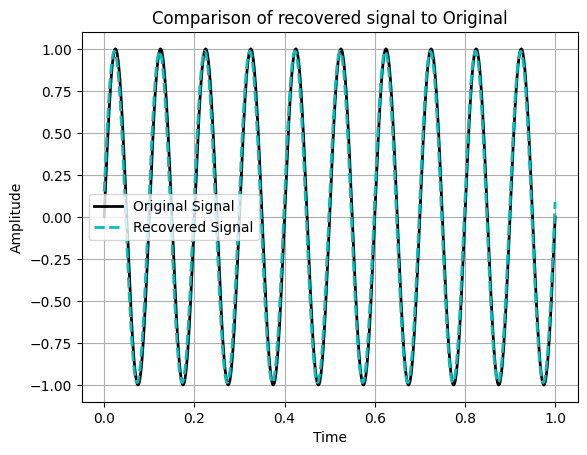

In [29]:
# use ifft or iverse fft to get back the time domain 
recovered_real_img = ifft(fft_filtered) # use ifft or iverse transeform 

# once again only take the real part of the inverse transform
# Compute the inverse FFT but we are only intrested in the real part of the signal 
recovered_signal = np.real(ifft(fft_filtered)) 

plt.plot(time, original_signal,'-', label="Original Signal", color='k', linewidth=2)
plt.plot(time, recovered_signal, '--', label="Recovered Signal", color='c', linewidth=2)

# Add labels, title, and legend
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Comparison of recovered signal to Original")
plt.legend()
plt.grid()

# Using a Hanning window before fft and filtering  
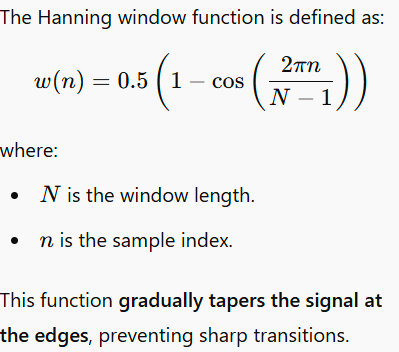

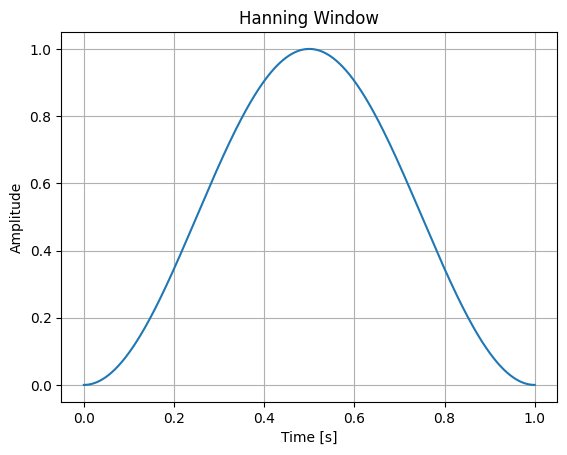

In [23]:
from scipy import signal
hann_window = signal.windows.hann(length_signal)  # Hanning window
length_signal = len(time)
fig, ax = plt.subplots()
plt.plot(time, hann_window)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.title("Hanning Window")
plt.show()

In [24]:
# Apply the Hanning window to smooth the FFT signal
centered_signal = final_siginal - np.mean(final_siginal)
centered_signal_hann = centered_signal * hann_window



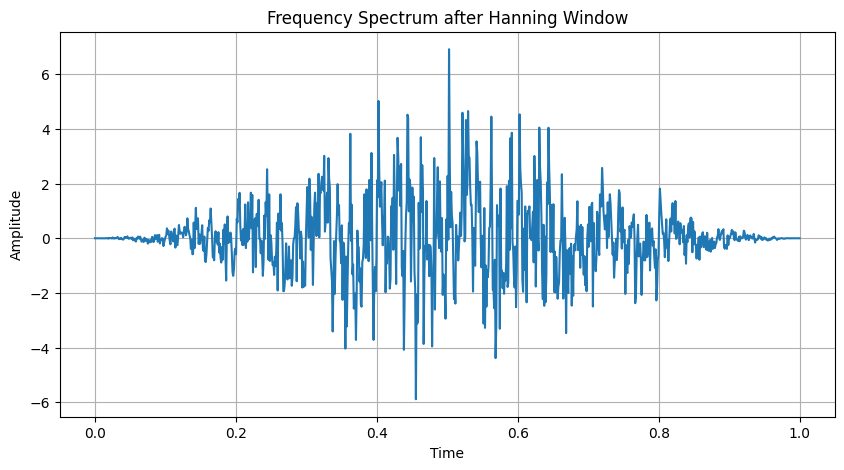

In [25]:
# Compute inverse FFT to get filtered time-domain signal
# Plot the frequency spectrum after filtering
plt.figure(figsize=(10, 5))
plt.plot(time, centered_signal_hann)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Frequency Spectrum after Hanning Window")
plt.grid()
plt.show()

In [26]:
fft_signal_hann = fft(centered_signal_hann)  # get FFT
filter_freq = f_original
filter_array = (np.abs(frequencies) > (filter_freq)) | (np.abs(frequencies) < (filter_freq - 0.1))
fft_signal_hann[filter_array] = 0  # Zero out unwanted frequencies

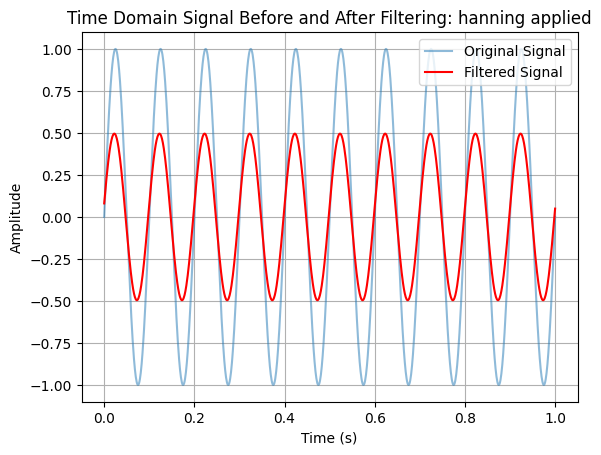

In [27]:

# Compute inverse FFT to get filtered time-domain signal
filtered_signal = np.fft.ifft(fft_signal_hann).real

# Plot original and filtered signal in time domain
plt.plot(time, original_signal, label="Original Signal", alpha=0.5)
plt.plot(time, filtered_signal, label="Filtered Signal", color='r')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time Domain Signal Before and After Filtering: hanning applied")
plt.legend()
plt.grid()
plt.show()